In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import itertools

In [2]:
#Loading the dataset files and show the head of each dataframe
white_df = pd.read_csv('winequality-white.csv', sep=';')

red_df = pd.read_csv('winequality-red.csv', sep=';')
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#adding "is_red" column for each data frame for the classification process
white_df['is_red'] = 0
white_df = white_df.drop_duplicates(keep = 'first')
red_df['is_red'] = 1
red_df = red_df.drop_duplicates(keep = 'first')

In [5]:
#concatenate the red and white wine dataframes
df = pd.concat([red_df, white_df], ignore_index = True)

In [6]:
#shuffling the data
df = df.iloc[np.random.permutation(len(df))]

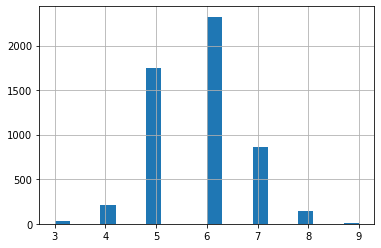

In [7]:
#Charting the quality of the wine
df['quality'].hist(bins = 20);

In [8]:
#eliminating the outlier values
df = df[(df['quality'] > 4) & (df['quality'] < 8)]
df = df.reset_index(drop = True)

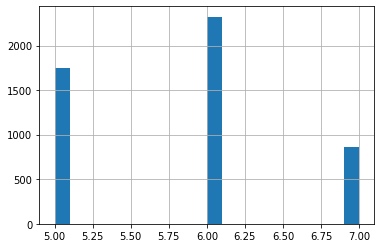

In [9]:
df['quality'].hist(bins=20);

In [10]:
#splitting the data into train, validatiom and test sets
train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

In [11]:
train_stats = train.describe()
train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.212789,1.308693,4.20000,6.400000,7.00000,7.70000,15.90000
volatile acidity,3155.0,0.340060,0.163603,0.08000,0.230000,0.29000,0.40000,1.33000
citric acid,3155.0,0.318758,0.146489,0.00000,0.240000,0.31000,0.40000,1.23000
residual sugar,3155.0,5.105135,4.650744,0.70000,1.800000,2.70000,7.50000,65.80000
chlorides,3155.0,0.057664,0.038812,0.00900,0.038000,0.04700,0.06700,0.61100
free sulfur dioxide,3155.0,30.307132,17.093090,1.00000,17.000000,28.00000,41.00000,128.00000
total sulfur dioxide,3155.0,115.122029,56.737935,7.00000,75.000000,117.00000,156.00000,344.00000
density,3155.0,0.994597,0.003037,0.98711,0.992235,0.99478,0.99685,1.03898
pH,3155.0,3.223502,0.159323,2.74000,3.110000,3.21000,3.32500,4.01000
sulphates,3155.0,0.536849,0.147526,0.22000,0.440000,0.51000,0.60000,1.98000


In [12]:
#split the labels form the featurs
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [13]:
# format the output of the train set
train_Y = format_output(train)

# format the output of the val set
val_Y = format_output(val)
    
# format the output of the test set
test_Y = format_output(test)

In [14]:
#normalize data
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [15]:
# normalize the train set
norm_train_X = norm(train) 
    
# normalize the val set
norm_val_X = norm(val)
    
# normalize the test set
norm_test_X = norm(test)

In [16]:
#define the model
inputs = Input(shape=(11,))
x = Dense(128, activation = 'relu')(inputs)
x = Dense(128, activation = 'relu')(x)
wine_quality = Dense(1, name='wine_quality')(x)
wine_type = Dense(1, activation = 'sigmoid', name = 'wine_type')(x)
model = Model(inputs = inputs, outputs = [wine_quality, wine_type])

#building the model
model.compile(optimizer = RMSprop(learning_rate = 0.0001),
              loss = {'wine_quality':'mse', 'wine_type':'binary_crossentropy'},
              metrics = {'wine_quality': tf.keras.metrics.RootMeanSquaredError(), 'wine_type':'accuracy'})

In [17]:
history = model.fit(norm_train_X, train_Y, 
                    epochs = 40, validation_data=(norm_val_X, val_Y))

Epoch 1/40
99/99 [==============================] - 1s 5ms/step - loss: 25.6342 - wine_quality_loss: 24.9120 - wine_type_loss: 0.7221 - wine_quality_root_mean_squared_error: 4.9912 - wine_type_accuracy: 0.3626 - val_loss: 17.6453 - val_wine_quality_loss: 16.9855 - val_wine_type_loss: 0.6598 - val_wine_quality_root_mean_squared_error: 4.1213 - val_wine_type_accuracy: 0.6248
Epoch 2/40
99/99 [==============================] - 0s 3ms/step - loss: 11.7954 - wine_quality_loss: 11.1940 - wine_type_loss: 0.6014 - wine_quality_root_mean_squared_error: 3.3457 - wine_type_accuracy: 0.8244 - val_loss: 6.5805 - val_wine_quality_loss: 6.0439 - val_wine_type_loss: 0.5365 - val_wine_quality_root_mean_squared_error: 2.4584 - val_wine_type_accuracy: 0.9290
Epoch 3/40
99/99 [==============================] - 0s 3ms/step - loss: 4.5110 - wine_quality_loss: 4.0366 - wine_type_loss: 0.4744 - wine_quality_root_mean_squared_error: 2.0091 - wine_type_accuracy: 0.9258 - val_loss: 2.7656 - val_wine_quality_loss

Epoch 23/40
99/99 [==============================] - 0s 3ms/step - loss: 0.6339 - wine_quality_loss: 0.5949 - wine_type_loss: 0.0391 - wine_quality_root_mean_squared_error: 0.7713 - wine_type_accuracy: 0.9921 - val_loss: 0.6781 - val_wine_quality_loss: 0.6439 - val_wine_type_loss: 0.0341 - val_wine_quality_root_mean_squared_error: 0.8025 - val_wine_type_accuracy: 0.9937
Epoch 24/40
99/99 [==============================] - 0s 3ms/step - loss: 0.6071 - wine_quality_loss: 0.5689 - wine_type_loss: 0.0382 - wine_quality_root_mean_squared_error: 0.7542 - wine_type_accuracy: 0.9921 - val_loss: 0.6570 - val_wine_quality_loss: 0.6240 - val_wine_type_loss: 0.0330 - val_wine_quality_root_mean_squared_error: 0.7899 - val_wine_type_accuracy: 0.9937
Epoch 25/40
99/99 [==============================] - 0s 2ms/step - loss: 0.5787 - wine_quality_loss: 0.5414 - wine_type_loss: 0.0374 - wine_quality_root_mean_squared_error: 0.7358 - wine_type_accuracy: 0.9924 - val_loss: 0.6311 - val_wine_quality_loss: 0

In [18]:
# Gather the training metrics
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

25/25 [==============================] - 0s 2ms/step - loss: 0.4406 - wine_quality_loss: 0.4157 - wine_type_loss: 0.0250 - wine_quality_root_mean_squared_error: 0.6447 - wine_type_accuracy: 0.9962

loss: 0.44060900807380676
wine_quality_loss: 0.41565340757369995
wine_type_loss: 0.024955565109848976
wine_quality_rmse: 0.6447118520736694
wine_type_accuracy: 0.9961977005004883


In [19]:
#analyze the model performance
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)
    
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()
    
def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

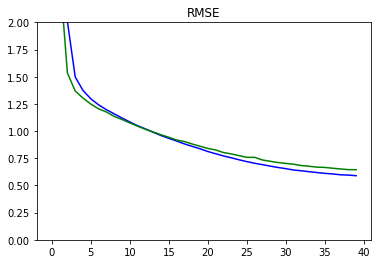

In [20]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

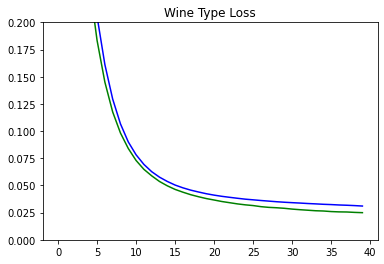

In [21]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)

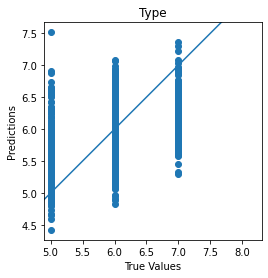

In [22]:
scatter_plot = plot_diff(test_Y[0], quality_pred, title='Type')